# Лабораторная работа №2

## Киреев Константин 8383

In [1]:
import numpy as np
import cv2 as cv
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"
import requests 
import shutil 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Вывод изображения

In [2]:
def viewImage(image, name_of_window):
    cv.namedWindow(name_of_window, cv.WINDOW_NORMAL)
    cv.imshow(name_of_window, image)
    cv.waitKey(0)
    cv.destroyAllWindows()

### Загрузка картинки

In [3]:
def pic_from_host(cur_path):
    image_url = 'https://i.ibb.co/DfBNgt7/oirg.jpg'
    filename = cur_path
    r = requests.get(image_url, stream = True)
    if r.status_code == 200:
        r.raw.decode_content = True
        with open(filename,'wb') as f:
            shutil.copyfileobj(r.raw, f)        
        print('Успешно загружено: ',filename)
    else:
        print('Не найдено')

## Основа

In [14]:
def processing(path, minDc, minR, maxR):
    # Получаем изображение
    img = cv.imread(path)
    h, w = img.shape[:2]
    
    # cv2.HoughCircles требуется 8-битное одноканальное изображение, 
    # поэтому нужно преобразование из RGB в оттенки серого
    gr_scale = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    cv.imwrite('pics/gr_scale.jpg', gr_scale)
    
    # размытие, чтобы уменьшить шум и избежать ложного обнаружения кругов
    img_blur = cv.medianBlur(gr_scale, 5)
    cv.imwrite('pics/img_blur.jpg', img_blur)
    
    circles = cv.HoughCircles(img_blur, cv.HOUGH_GRADIENT, 1.5, minDc, param1=80, 
                              param2=50, minRadius=minR, maxRadius=maxR)
    
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
    print(f'Количество кругов: {len(circles)}')
    
    # рисуем круги
    for (x, y, r) in circles:
        cv.circle(img, (x, y), r, color=(255,0,0), thickness=2)
        cv.rectangle(img, (x-3 , y-3), (x+3, y+3), (0, 100, 100), -1)        
        cv.imwrite('pics/result.bmp', img)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

## Работа

##### Изображение загружается автоматически в папку $pics$

In [10]:
%mkdir pics

Подпапка или файл pics уже существует.


In [11]:
path = 'pics/original.jpg'
pic_from_host(path)

Успешно загружено:  pics/original.jpg


In [12]:
minDc = 50
minR = 30
maxR = 60

Количество кругов: 5


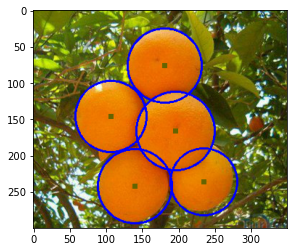

In [13]:
processing(path, minDc, minR, maxR)